## Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
sns.set_style('darkgrid')

## Read the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/SalmanHabeeb/Titanic/main/train.csv")

## EDA

Let's check the kind of values present in our data

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Since the columns PassengerId, Name and Ticket are unique to each passenger, they may not be significant. Hence, let's drop these columns

In [6]:
df = df.drop(columns = ["PassengerId", "Name", "Ticket"])

Let's see the correlation matrix. It will give us information about how the columns are related to our target variable, which in this case is Survived column

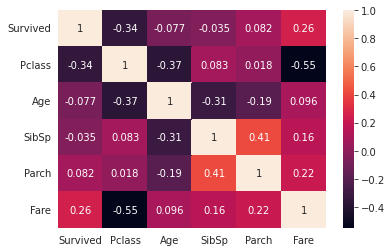

In [7]:
sns.heatmap(df.corr(), annot = True)
plt.show()

From the correlation plot, it is clear that the survival depends heavily on class and fare. However, in above correlation matrix, categorical variables are not included.

To address this problem, we need to convert categorical variables to numerical data.

Let's check the precise types of data present in categorical columns

In [8]:
for column in df.dtypes[df.dtypes == object].index:
    print(f"{column}: {df[column].nunique()}")

Sex: 2
Cabin: 147
Embarked: 3


In [9]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [10]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

From the results we get by running previous three code cells, we can see that Sex and Embarked variables have less no. of unique values. These columns can be handled by numerical substitution. However, Cabin column has a large no. of unique values. So, let's group the values on the basis of alphabet present in the Cabin cell. For example, if the Cabin cell contains a string-'B 160', we will substitute it with letter 'B'.

In [12]:
def replace_with_one_letter(x):
  if not pd.isnull(x):
    pattern = r'[A-Z]'
    letter = re.findall(pattern, x)[0]
    return letter

In [13]:
df["Cabin"] = df["Cabin"].apply(replace_with_one_letter)

Since we have only alphabets, let's check the unique count of each value in Cabin column.

In [14]:
df["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [15]:
def plot_chances(
    target_columns,
    chance_column,
    df,
    figsize  = (12, 8),
    layout=None,
    y_label = 'Y',
    title_fontweight = 'bold',
    title_fontstyle = 'italic',
    title_fontsize = 15,
    ):
    '''
        Input:- target_columns   : (string type) Name of columns whose events are to be plotted on x-axis
                chance_column    : (string type) Name of column which denotes occurance of single event using 0 and 1. Conditional 
                                   probability of this column is to plotted.
                df               : (Pandas DataFrame type) Dataframe which contains target_column and chance_column as columns
                figsize          : (tuple of int) It contains the size of figure we want for the plot
                y_label          : (string type) Denotes label for y-axis
                title_fontweight : (string type) Used to set the fontweight argument of plt.title()
                title_fontstyle  : (string type) Used to set the fontstyle argument of plt.title()
                title_fontsize   : (string type) Used to set the fontsize argument of plt.title()

        Computes the coonditional probability of occurance of event represented in chance_column, given that a unique event from 
        target_column took place.

        Displays matplotlib bar plots of the computed probability. The probability is plotted along y-axis while the events from 
        target_column are along x_axis.
    '''
    fig, ax = plt.subplots(layout[0], layout[1], figsize=figsize)
    counter = 0
    for i in range(layout[0]):
        for j in range(layout[1]):
            target_column = target_columns[counter]
            x_label = target_column
            values = list(df[target_column].unique())
            x_tick_labels = values
            for k in range(len(values)):
                ax[i, j].bar(k, df[df[target_column] == values[k]][chance_column].mean())
            
            ax[i, j].set_xlabel(x_label)
            ax[i, j].set_ylabel(f"Chance of {y_label}")
            ax[i, j].set_xticks(np.arange(len(x_tick_labels)))
            ax[i, j].set_xticklabels(x_tick_labels)

            title = f"{x_label} vs Chance of {y_label}"
            ax[i, j].set_title(title, fontweight = title_fontweight, fontstyle = title_fontstyle, fontsize = title_fontsize)
            counter += 1
    plt.show()

In [16]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

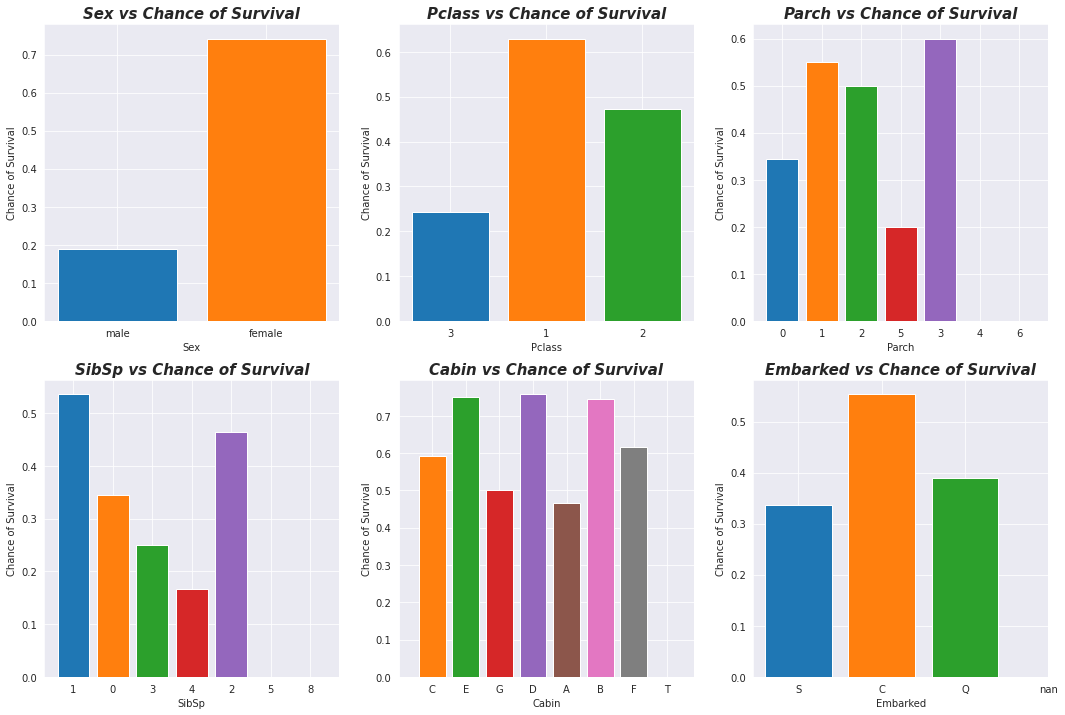

In [17]:
columns = ["Sex", "Pclass", "Parch", "SibSp", "Cabin", "Embarked"]
plot_chances(target_columns=columns,
chance_column='Survived',
df=df,
figsize=(18, 12),
layout=(2, 3),
y_label='Survival',
)

Let's make a countplot of the age, each for different survival class.

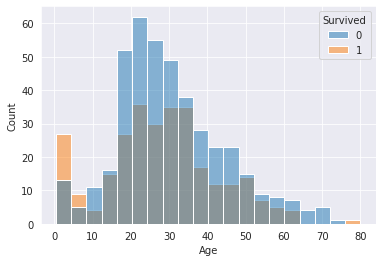

In [18]:
sns.histplot(data = df, x = "Age", hue = "Survived")
plt.show()

Although age does not seem to be a considerable factor, those aged 0-10 have a higher chance of survival.

Now, let's make a distribution plot for fare, each for different class of Survived.

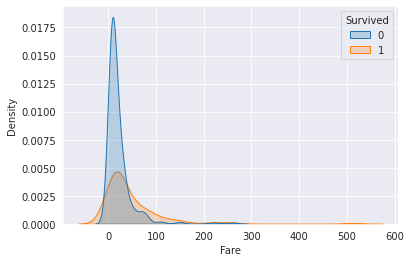

In [19]:
sns.kdeplot(data = df, hue = "Survived", x = "Fare", shade = True)
plt.show()

Clearly, those with higher fares had higher survival chances.

## Data Cleaning

Let's check for null values

In [20]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Now, let's fill the age column with randomly sampled numbers from a normal distribution.

In [21]:
def fill_normalized_values(x):
  if pd.isnull(x):
    np.random.seed(1)
    mean = df["Age"].mean()
    std = df["Age"].std()
    return np.random.normal(mean, std)
  else:
    return x

In [22]:
df["Age"] = df["Age"].apply(fill_normalized_values)

Let's fill the Embarked nan values with the modal value of the column.

In [23]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

Let's fill the null values in Cabin column with 'G', since it has 50% chance of survival, and hence may not influence our model.

In [24]:
df["Cabin"] = df["Cabin"].fillna("G")

In [25]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Finally, the data is cleaned.

## Preparing the dataset.

In [26]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Now, we will convert these categorical columns to numerical columns.

In [27]:
df["Sex"] = (df["Sex"] == "female").astype(int)

In [28]:
df_dict = df.to_dict(orient = "records")

In [29]:
dv = DictVectorizer(sparse=False)

In [30]:
data = dv.fit_transform(df_dict)

In [31]:
data = pd.DataFrame(data, columns = dv.get_feature_names_out())

In [32]:
data

,Age,Cabin=A,Cabin=B,Cabin=C,Cabin=D,Cabin=E,Cabin=F,Cabin=G,Cabin=T,Embarked=C,Embarked=Q,Embarked=S,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.2500,0.0,3.0,0.0,1.0,0.0
1,38.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,71.2833,0.0,1.0,1.0,1.0,1.0
2,26.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.9250,0.0,3.0,1.0,0.0,1.0
3,35.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.1000,0.0,1.0,1.0,1.0,1.0
4,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0500,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0000,0.0,2.0,0.0,0.0,0.0
887,19.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0000,0.0,1.0,1.0,0.0,1.0
888,53.295166,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,23.4500,2.0,3.0,1.0,1.0,0.0
889,26.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0000,0.0,1.0,0.0,0.0,1.0


Let's plot a correlation matrix.

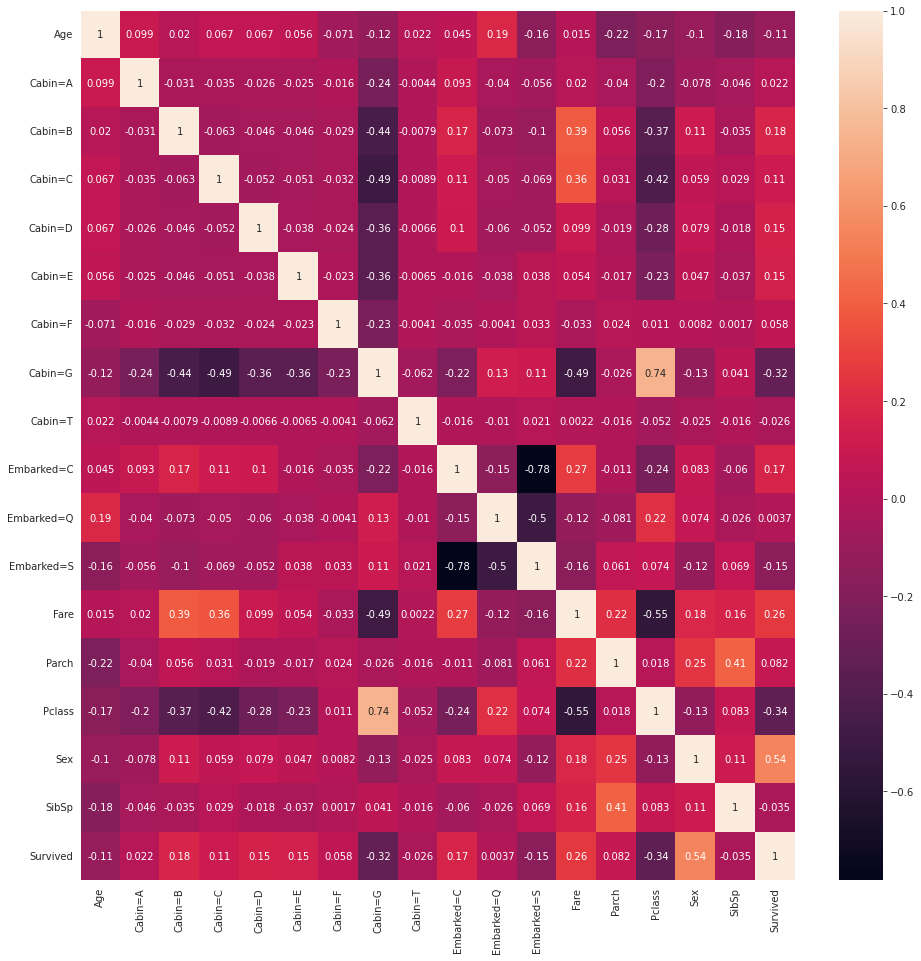

In [33]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [34]:
data = data.drop(columns = [column for column in data.columns if not (abs(data[column].corr(data["Survived"])) > 0.1)])

In [35]:
data.columns

Index(['Age', 'Cabin=B', 'Cabin=C', 'Cabin=D', 'Cabin=E', 'Cabin=G',
       'Embarked=C', 'Embarked=S', 'Fare', 'Pclass', 'Sex', 'Survived'],
      dtype='object')

In [36]:
df_train, df_test = train_test_split(data, test_size = 0.25, random_state = 1)

In [37]:
X_train = df_train.drop(columns = ["Survived"])
y_train = df_train["Survived"]

In [38]:
X_test = df_test.drop(columns = ["Survived"])
y_test = df_test["Survived"]

## Modeling the data

In [39]:
model = LogisticRegression(C = 1, max_iter = 500, random_state = 1)
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [41]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [42]:
accuracy_score(train_preds, y_train)

0.8143712574850299

In [43]:
accuracy_score(test_preds, y_test)

0.8026905829596412

In [44]:
for c in [0.947, 0.948, 0.95, 0.955]:
    model = LogisticRegression(C = c, max_iter = 1000, random_state = 1, solver = "liblinear")
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    print(c, accuracy_score(test_preds, y_test))

0.947 0.7892376681614349
0.948 0.8026905829596412
0.95 0.8026905829596412
0.955 0.8026905829596412


In [45]:
best_c = 0.948

In [46]:
final_model = LogisticRegression(C = best_c, max_iter = 1000, random_state = 1, solver = "liblinear")
final_model.fit(X_train, y_train)
test_preds = final_model.predict(X_test)
print("Accuracy : ", accuracy_score(test_preds, y_test))

Accuracy :  0.8026905829596412


In [47]:
print("roc_auc_score :", roc_auc_score(y_test, test_preds))

roc_auc_score : 0.794202302631579
